In [1]:
import psi4
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define distances in Angstroms
# Coarse range for distances outside 3.7–3.9 Å
coarse_distances = np.linspace(3.5, 3.7, 5)  # 5 points from 3.5 to just under 3.7
coarse_distances = np.append(coarse_distances, np.linspace(3.9, 6.0, 15))  # 15 points from just over 3.9 to 6.0

# Fine range for distances between 3.7 and 3.9 Å
fine_distances = np.linspace(3.7, 3.9, 10)  # 10 points between 3.7 and 3.9

# Combine both ranges
distances = np.unique(np.concatenate((coarse_distances, fine_distances)))

# distances = np.linspace(3.5, 6.0, 20)

# Placeholder for storing energies
energies = []

# Define Argon dimer geometry
argon_geometry_template = """
Ar
--
Ar 1 {0}
"""

# Loop over distances to calculate interaction energy
for R in distances:
    molecule = psi4.geometry(argon_geometry_template.format(R))
    psi4.set_options({'freeze_core': True})
    
    # Using a CCSD(T) calculation with counterpoise correction for accuracy
    energy = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=molecule)
    energies.append(energy * psi4.constants.hartree2kcalmol)  # Convert to kcal/mol

# Convert energies to NumPy array for further processing
energies = np.array(energies)


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

In [2]:
def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r)**12 - (sigma / r)**6)

In [3]:
# Initial guesses for sigma and epsilon
initial_guess = [3.6, 0.1]

# Curve fitting to determine sigma and epsilon
params, covariance = curve_fit(lj, distances, energies, p0=initial_guess)
sigma_fit, eps_fit = params
print(f"Fitted sigma: {sigma_fit}, Fitted epsilon: {eps_fit}")

Fitted sigma: 3.639223704912053, Fitted epsilon: 0.12307765870292466


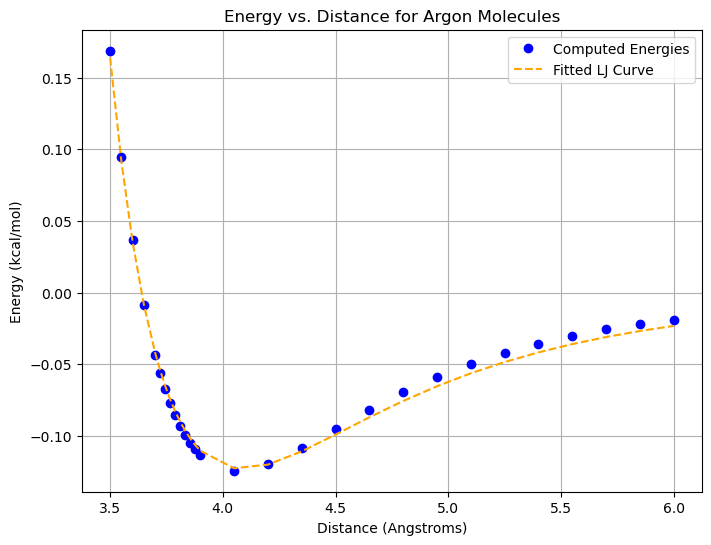

In [5]:
# Generate fitted LJ curve data
fitted_energies = lj(distances, sigma_fit, eps_fit)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(distances, energies, 'o', label="Computed Energies", color='blue')
plt.plot(distances, fitted_energies, '--', label="Fitted LJ Curve", color='orange')
plt.xlabel("Distance (Angstroms)")
plt.ylabel("Energy (kcal/mol)")
plt.title("Energy vs. Distance for Argon Molecules")
plt.legend()
plt.grid(True)

# Save the figure in the Figures directory
plt.savefig("argon_energy_vs_distance.png")
plt.show()